<h1>K - means on Image

<h3>이미지를 K개의 색상으로 conversion

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from skimage import io
from sklearn.datasets import load_sample_image

sample = io.imread("sample.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(sample);

In [2]:
x,y,z = sample.shape

In [3]:
data = sample / 255.0 # use 0...1 scale
data = data.reshape(x * y, z)
data.shape

(518400, 3)

In [4]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

In [5]:
K_num = 8

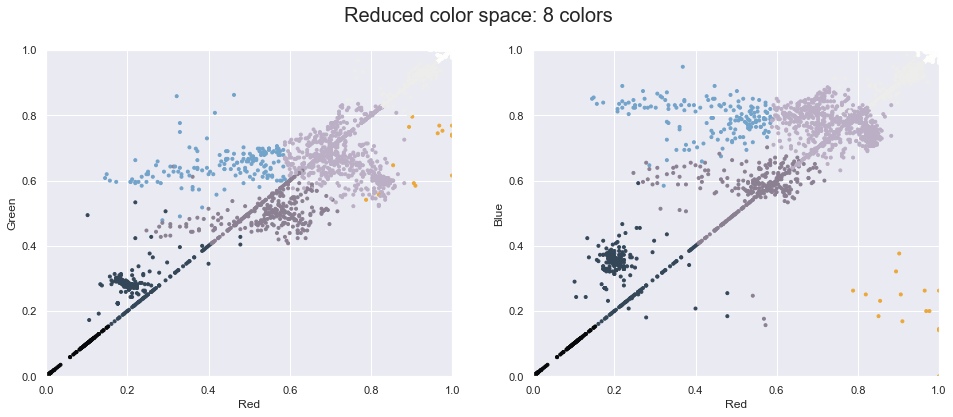

In [6]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(K_num)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: "+str(K_num)+" colors")

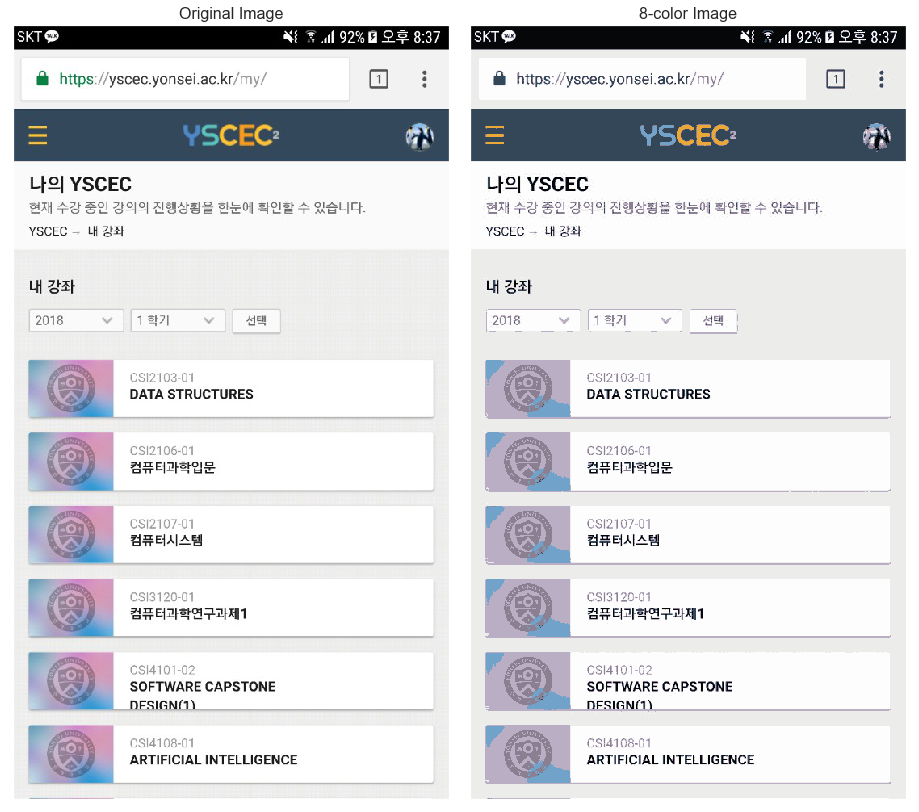

In [7]:
sample_recolored = new_colors.reshape(sample.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 16),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(sample)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(sample_recolored)
ax[1].set_title(str(K_num)+'-color Image', size=16);

In [8]:
new_colors

array([[0.02737409, 0.02983468, 0.03367935],
       [0.02737409, 0.02983468, 0.03367935],
       [0.02737409, 0.02983468, 0.03367935],
       ...,
       [0.92855615, 0.92890473, 0.92527629],
       [0.92855615, 0.92890473, 0.92527629],
       [0.92855615, 0.92890473, 0.92527629]])

In [9]:
target_colors = new_colors * 255
target_colors = np.int32(target_colors)
target_colors

array([[  6,   7,   8],
       [  6,   7,   8],
       [  6,   7,   8],
       ...,
       [236, 236, 235],
       [236, 236, 235],
       [236, 236, 235]])

<h3>목표</h3>
1. 이 target_colors에 있는 color가 K 개수만큼 그룹화할 수 있으니까 K개의 color를 target_colors array를 tarversing하면서 K 개의 색을 찾아내고 표시해준다
<br>
2. 표시한 색상중 하나를 선택할 시에 target_colors array에서 해당 컬러를 tarversing하면서 찾아내어 원하는 색으로 바꾼다
<br>
3. unique한 color의 갯수또한 확인하여 clickable colorbar 구현때 percentage에 따라 colorbar의 크기를 다르게 하기위한 용도로 사용

In [38]:
unique_rows, unique_counts = np.unique(target_colors, axis=0, return_counts=True)
arr = np.c_[ unique_rows, unique_counts ]
arr

array([[     6,      7,      8,  18749],
       [    52,     71,     88,  36149],
       [   113,    163,    202,   8218],
       [   138,    128,    146,  16441],
       [   186,    174,    196,  38300],
       [   235,    168,     56,    971],
       [   236,    236,    235, 164646],
       [   253,    253,    253, 234926]], dtype=int64)

In [43]:
arr = arr[arr[:,3].argsort()][::-1]
#np.argsort(-arr[:,3])
arr

array([[   253,    253,    253, 234926],
       [   236,    236,    235, 164646],
       [   186,    174,    196,  38300],
       [    52,     71,     88,  36149],
       [     6,      7,      8,  18749],
       [   138,    128,    146,  16441],
       [   113,    163,    202,   8218],
       [   235,    168,     56,    971]], dtype=int64)

In [42]:
df = pd.DataFrame(arr,columns=['R','G','B','counts'])
#R,G,B 순서가 아니라서 a b c로 표현함
df

,R,G,B,counts
0,253,253,253,234926
1,236,236,235,164646
2,186,174,196,38300
3,52,71,88,36149
4,6,7,8,18749
5,138,128,146,16441
6,113,163,202,8218
7,235,168,56,971


In [29]:
#arr[:, :-1][7]

In [22]:
#예시로 [184,168,190]를 [255,0,0]으로 바꾼다하면
#[R,G,B] 순서는 pillow와 변함없음
index = 3
changed_target_colors = 0
changed_target_colors = np.copy(target_colors)
to_color = [255,0,0]
np.place(changed_target_colors,changed_target_colors==arr[:, :-1][index],to_color)

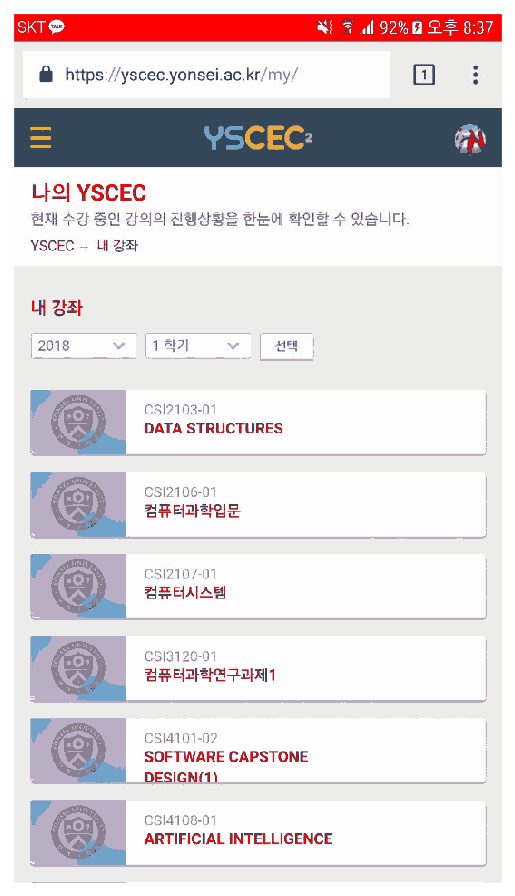

In [23]:
changed_target_colors = np.float64(changed_target_colors)
changed_target_colors /= 255
re_target_colored = changed_target_colors.reshape(sample.shape)
plt.figure(figsize=(16, 16))
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(re_target_colored)